In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import datetime as dt

#Also adding pathlib

from pathlib import Path

#Create a reference path to the file.
database_path = Path("../Resources/hawaii.sqlite")

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
# create engine to hawaii.sqlite
engine = create_engine(f"sqlite:///{database_path}")

In [6]:
# reflect an existing database into a new model

Base = automap_base()

# reflect the tables
Base.prepare(engine)


In [7]:
# View all of the classes that automap found
automap_found = Base.classes.keys()
print(automap_found)

#Choosing to store as VAR since a list was produced.
print(automap_found[0])
print(automap_found[1])

['measurement', 'station']
measurement
station


In [8]:
# Save references to each table
Measurement = Base.classes.measurement     #Base.classes.automap_found[0].astype("string")
Station = Base.classes.station    #Base.classes.automap_found[1].astype("string")

#print(Station)

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set.
most_recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()

print(most_recent_date)

('2017-08-23',)


In [17]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 

# Starting from the most recent data point in the database. 
most_recent_asTXT = most_recent_date[0]    #.astype("date") ... astype("string") also didn't work ... meh ... 
print(most_recent_asTXT) 
print(type(most_recent_asTXT))  #Confirmed as text ...

Date_TXT_Split = most_recent_asTXT.split("-")    #Orig_Year_series.str.split('-')   #NOTE ... since it's already "str" ... and not in a col ... it doesn't need the ".str" ... bridge to the "split" ... function ... 
print(Date_TXT_Split)

most_recent_asDT = dt.date(year=int(Date_TXT_Split[0]),month=int(Date_TXT_Split[1]),day=int(Date_TXT_Split[2]))
print(most_recent_asDT)
print(type(most_recent_asDT))

# Calculate the date one year from the last date in data set.
one_yr_prior_inclusive = most_recent_asDT - dt.timedelta(days=365)
print(one_yr_prior_inclusive)

# Perform a query to retrieve the data and precipitation scores
#Reviewed data set ... columns needed are titled "date" and "prcp" ... There's also "station" and "tobs" ... 

precipitation_score_data = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= one_yr_prior_inclusive).order_by(Measurement.date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
prcp_col_names = {
     "date" : "Date",
     "prcp" : "Precipitation"
}
precipitation_data_df = pd.DataFrame(data=precipitation_score_data).rename(columns=prcp_col_names)   # , columns=prcp_col_names) #Cannot be within the DF function to rename via a Dict ... 
precipitation_data_df.head()

# Sort the dataframe by date
precipitation_data_df.sort_values('Date')
precipitation_data_df.head()

2017-08-23
<class 'str'>
['2017', '08', '23']
2017-08-23
<class 'datetime.date'>
2016-08-23


,Date,Precipitation
0,2016-08-23,0.00
1,2016-08-23,0.15
2,2016-08-23,0.05
3,2016-08-23,NaN
4,2016-08-23,0.02


In [18]:
#Validate the datatypes within the DF for matplotlibs processing needs.

precipitation_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2230 entries, 0 to 2229
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           2230 non-null   object 
 1   Precipitation  2021 non-null   float64
dtypes: float64(1), object(1)
memory usage: 35.0+ KB


In [19]:
#Change the Date column to Date format.

precipitation_data_df["Date"] = pd.to_datetime(precipitation_data_df["Date"], format='%Y-%m-%d', errors = 'coerce')  

precipitation_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2230 entries, 0 to 2229
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           2230 non-null   datetime64[ns]
 1   Precipitation  2021 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 35.0 KB


In [30]:
# Use Pandas Plotting with Matplotlib to plot the data
print("++++++")
plt1_X_run =  pd.Series(pd.to_datetime(precipitation_data_df["Date"], format='%Y-%m-%d', errors = 'coerce'))    #precipitation_data_df["Date"].values #.index.values   # pd.Series(precipitation_data_df["Date"]) #precipitation_data_df.index
plt1_y_height = pd.Series(precipitation_data_df["Precipitation"])
print(plt1_X_run)
print(plt1_y_height)

++++++
0      2016-08-23
1      2016-08-23
2      2016-08-23
3      2016-08-23
4      2016-08-23
          ...    
2225   2017-08-22
2226   2017-08-23
2227   2017-08-23
2228   2017-08-23
2229   2017-08-23
Name: Date, Length: 2230, dtype: datetime64[ns]
0       0.00
1       0.15
2       0.05
3        NaN
4       0.02
        ... 
2225    0.50
2226    0.00
2227    0.00
2228    0.08
2229    0.45
Name: Precipitation, Length: 2230, dtype: float64


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


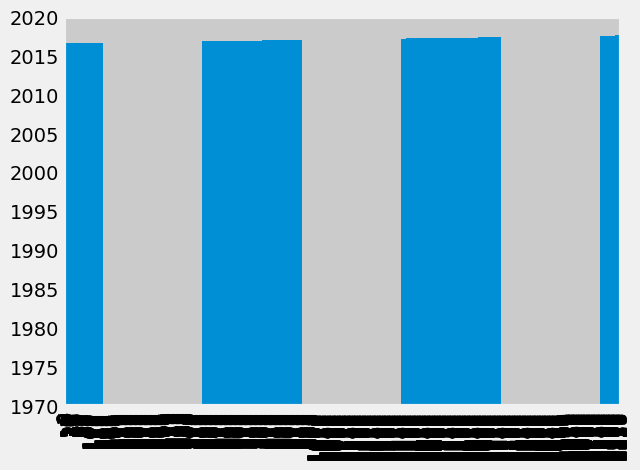

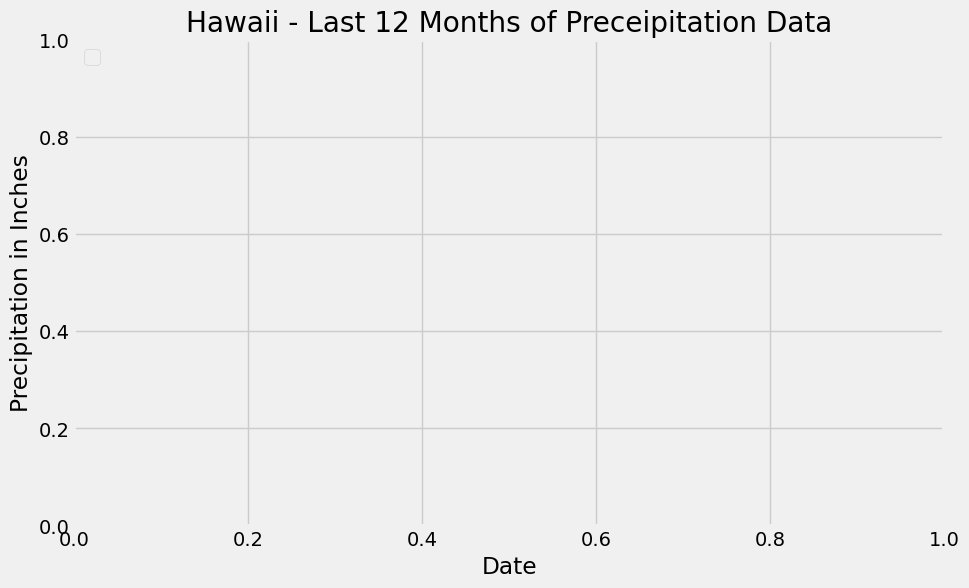

In [36]:
#NEED TO BE ABLE TO FIX THIS ... 



#Using Pandas.Plot ... 

precipitation_plot = precipitation_data_df["Date"].plot(kind="bar",
                                        #x=plt1_X_run, #x=precipitation_data_df["Date"],
                                        y=plt1_y_height, #y=precipitation_data_df["Precipitation"],
                                        #use_index=True, #via url => https://stackoverflow.com/questions/60137425/matplotlib-datetimeindex-error-none-of-the-values-are-in-the-columns
                                        label="Precipitation in Inches")
 #x=plt1_X_run,y=plt1_y_height)

#MY ERROR appears to be what this comment is alluding to ... a syntax issue b/c of pandas.plot() => https://stackoverflow.com/questions/66591266/keyerror-none-of-datetimeindex-are-in-the-columns-on-pandas-time-series


plt.figure(figsize=(10, 6))
fig1_title = plt.title("Hawaii - Last 12 Months of Preceipitation Data")
plt.xlabel("Date")
plt.ylabel("Precipitation in Inches")
#plt.xticks(plt1_X_run)
plt.legend(loc="upper left")
plt.show(precipitation_plot)

In [38]:
# Use Pandas to calculate the summary statistics for the precipitation data
summary_statistics = precipitation_data_df['Precipitation'].describe()

print(summary_statistics)

count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: Precipitation, dtype: float64


# Exploratory Station Analysis

In [41]:
# Design a query to calculate the total number of stations in the dataset
stations_total_count = session.query(func.count(Station.station)).all()
print(f"The Total Number of Stations in the Stations DataSet is:\n{stations_total_count[0]}")

The Total Number of Stations in the Stations DataSet is:
(9,)


In [47]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.

most_active_stations_measured = session.query(Measurement.station, func.count(Measurement.station)).\
                       group_by(Measurement.station).\
                       order_by(func.count(Measurement.station).desc()).all()

for station_id, counted in most_active_stations_measured:
    print(f"Measured Station: {station_id}, Dataset Observation Count: {counted}")

Measured Station: USC00519281, Dataset Observation Count: 2772
Measured Station: USC00519397, Dataset Observation Count: 2724
Measured Station: USC00513117, Dataset Observation Count: 2709
Measured Station: USC00519523, Dataset Observation Count: 2669
Measured Station: USC00516128, Dataset Observation Count: 2612
Measured Station: USC00514830, Dataset Observation Count: 2202
Measured Station: USC00511918, Dataset Observation Count: 1979
Measured Station: USC00517948, Dataset Observation Count: 1372
Measured Station: USC00518838, Dataset Observation Count: 511


In [53]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
isolated_most_measured_station = most_active_stations_measured[0][0]

temperature_stats_fetch = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
                    filter(Measurement.station == isolated_most_measured_station).all()

print(temperature_stats_fetch)
print(f"\n+++++++")

isol_lowest_temp, isol_highest_temp, isol_avg_temp = temperature_stats_fetch[0]

print(f"The most measured station from the dataset has the ID of:\n{isolated_most_measured_station}")
print(f"Lowest Temperature: {isol_lowest_temp}")
print(f"Highest Temperature: {isol_highest_temp}")
print(f"Average Temperature: {isol_avg_temp:.2f}")

[(54.0, 85.0, 71.66378066378067)]

+++++++
The most measured station from the dataset has the ID of:
USC00519281
Lowest Temperature: 54.0
Highest Temperature: 85.0
Average Temperature: 71.66


In [59]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

#persNote -> A repeat of the ask above via => # Perform a query to retrieve the data and precipitation scores
#Reviewed data set ... columns needed are titled "date" and "prcp" ... There's also "station" and "tobs" ... 
     #1#precipitation_score_data = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= one_yr_prior_inclusive).order_by(Measurement.date).all()
     #1a# Save the query results as a Pandas DataFrame. Explicitly set the column names
     #2#prcp_col_names = {
     #"date" : "Date",
     #"prcp" : "Precipitation"
     #}
     #3#precipitation_data_df = pd.DataFrame(data=precipitation_score_data).rename(columns=prcp_col_names)   # , columns=prcp_col_names) #Cannot be within the DF function to rename via a Dict ... 
     #4#precipitation_data_df.head()

isol_most_measured_station_plot_data = session.query(Measurement.station, Measurement.tobs).\
     filter(Measurement.date >= one_yr_prior_inclusive).\
     filter(Measurement.station == isolated_most_measured_station).all()

#isol_most_measured_station_plot_data

isol_plot_col_names = {"station" : "Station", "tobs":"Temperature"}

isol_most_activemeasured_station_plot_df = pd.DataFrame(isol_most_measured_station_plot_data).rename(columns=isol_plot_col_names)
isol_most_measured_station_plot_df.info()


# Plotting DataFrame
#isol_most_activemeasured_station_plot_df["Temperature"].plot.hist(bins = 12, title="Temperature of most active station over last 12 months", rot=90)
#plt.xlabel("Temperature")
#plt.ylabel("Frequency")
#plt.show()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352 entries, 0 to 351
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   station  352 non-null    object 
 1   tobs     352 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.6+ KB


# Close Session

In [16]:
# Close Session
session.close()